In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os



In [46]:
#read data
data = pd.read_csv("heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


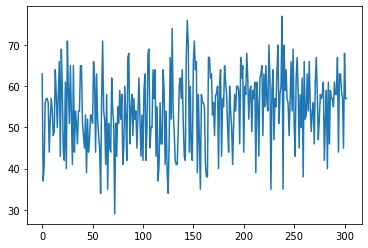

In [11]:
laste = data['age'].plot() 
plt.show(laste) 
# PLot to check the age distribution across database & to find quartile

In [13]:
#Split Data as M&B
A = data[data.target == 1]
B = data[data.target == 0]

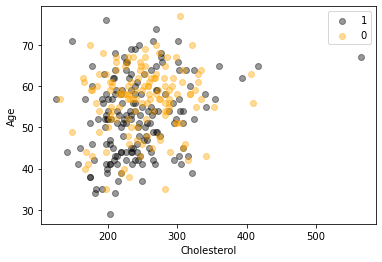

In [14]:
#Visualization, Scatter Plot

plt.scatter(A.chol,A.age,color = "Black",label="1",alpha=0.4)
plt.scatter(B.chol,B.age,color = "Orange",label="0",alpha=0.4)
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.legend()
plt.show()


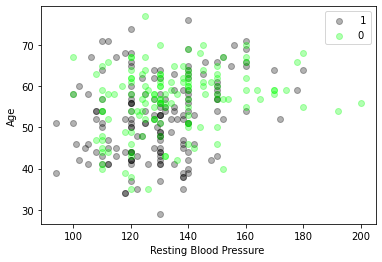

In [15]:
#Visualization, Scatter Plot

plt.scatter(A.trestbps,A.age,color = "Black",label=" 1",alpha=0.3)
plt.scatter(B.trestbps,B.age,color = "Lime",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Age")
plt.legend()
plt.show()

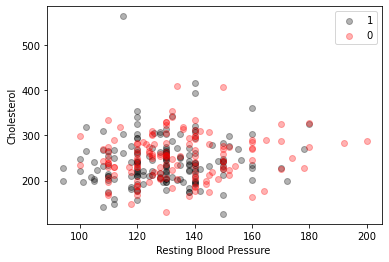

In [16]:
#Visualization, Scatter Plot

plt.scatter(A.trestbps,A.chol,color = "Black",label="1",alpha=0.3)
plt.scatter(B.trestbps,B.chol,color = "red",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

In [17]:
#Seperate data
y =data.target.values
x1=data.drop(["target"],axis=1)

In [18]:
#Normalization 
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

#Split For Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [19]:
#transposition
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
print("Test Accuracy {}".format(LR.score(xtest.T,ytest.T))) 
LRscore =LR.score(xtest.T,ytest.T)

Test Accuracy 0.8524590163934426


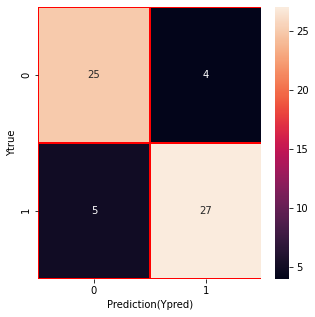

In [27]:
#Confusion Matrix

yprediciton1= LR.predict(xtest.T)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

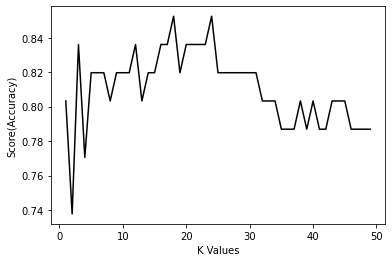

In [29]:
#Find Optimum K value
scores = []
for each in range(1,50):
    KNNfind = KNeighborsClassifier(n_neighbors = each)
    KNNfind.fit(xtrain.T,ytrain.T)
    scores.append(KNNfind.score(xtest.T,ytest.T))
    
plt.plot(range(1,50),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [30]:
KNNfind = KNeighborsClassifier(n_neighbors = 24) #n_neighbors = K value
KNNfind.fit(xtrain.T,ytrain.T) #learning model
prediction = KNNfind.predict(xtest.T)
print("{}-NN Score: {}".format(25,KNNfind.score(xtest.T,ytest.T)))
KNNscore = KNNfind.score(xtest.T,ytest.T)

25-NN Score: 0.8524590163934426


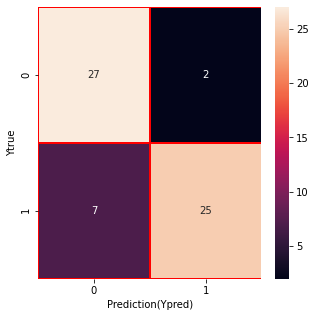

In [31]:

yprediciton2= KNNfind.predict(xtest.T)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [32]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)
SVM.fit(xtrain.T,ytrain.T)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(xtest.T,ytest.T))

SVMscore = SVM.score(xtest.T,ytest.T)

SVM Accuracy: 0.8360655737704918


In [33]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=2)
DTC.fit(xtrain.T,ytrain.T) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(xtest.T,ytest.T))
DTCscore = DTC.score(xtest.T,ytest.T)

Decision Tree Score:  0.8524590163934426


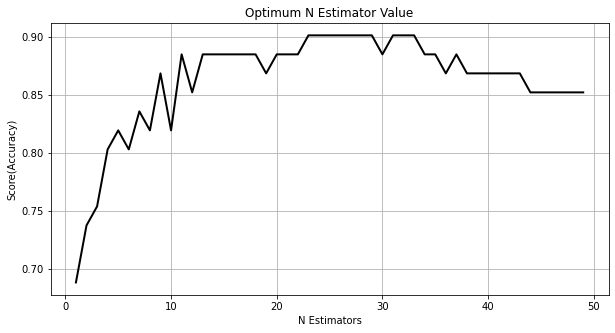

Random Forest Score:  0.9016393442622951


In [34]:
from sklearn.ensemble import RandomForestClassifier
#Find Optimum K value
scores = []
for each in range(1,50):
    RFfind = RandomForestClassifier(n_estimators = each,random_state=5)
    RFfind.fit(xtrain.T,ytrain.T)
    scores.append(RFfind.score(xtest.T,ytest.T))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

RFfind= RandomForestClassifier(n_estimators = 24, random_state=5) #n_estimator = DT
RFfind.fit(xtrain.T,ytrain.T) # learning
print("Random Forest Score: ",RFfind.score(xtest.T,ytest.T))
RFCscore=RFfind.score(xtest.T,ytest.T)

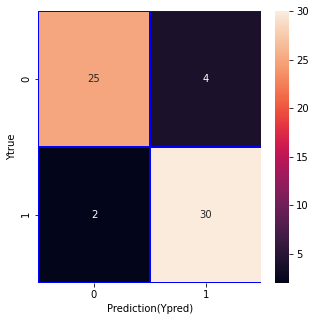

In [35]:
#Confusion Matrix

yprediciton2= RFfind.predict(xtest.T)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="blue",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [36]:
# #transposition
# xtrain = xtrain.T
# xtest = xtest.T
# ytrain = ytrain.T
# ytest = ytest.T





from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# fit model no training data
DTC = XGBClassifier()
DTC.fit(xtrain.T, ytrain.T)
print(model)


# make predictions for test data
y_pred = DTC.predict(xtest.T)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(ytest.T, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 81.97%


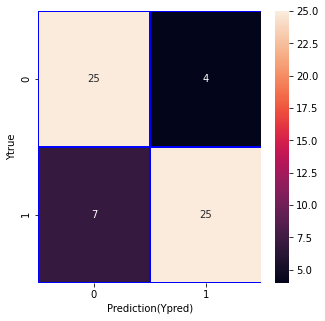

In [37]:
#Confusion Matrix

yprediciton2= model.predict(xtest.T)
ytrue = ytest

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="blue",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [39]:
scores=[LRscore,KNNscore,SVMscore,DTCscore,RFCscore,accuracy]
AlgorthmsName=["Logistic Regression","K-NN","SVM","Decision Tree", "Random Forest","XGBoost"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [40]:
from pycaret.classification import *

In [41]:
# Importing dataset
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
diabetes.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [49]:
clf1 = setup(data = diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,2547
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [48]:
clf2 = setup(data = data, target = 'target')

Setup Succesfully Completed!


,Description,Value
0,session_id,5028
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(303, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [52]:
clf1 = setup(data = diabetes, target = 'Class variable')

# return best model
best = compare_models()

# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'

# compare specific models
best_specific = compare_models(whitelist = ['dt','rf','xgboost'])

# blacklist certain models
best_specific = compare_models(blacklist = ['catboost', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.7861,0.8522,0.6380,0.7126,0.6640,0.5112,0.5184,0.1852
1,Logistic Regression,0.7767,0.8354,0.5892,0.7215,0.6391,0.4827,0.4935,0.0489
2,CatBoost Classifier,0.7765,0.8611,0.6360,0.6950,0.6508,0.4905,0.5009,3.3611
3,Light Gradient Boosting Machine,0.7673,0.8385,0.6471,0.6791,0.6516,0.4795,0.4884,0.1158
4,Decision Tree Classifier,0.7637,0.7380,0.6532,0.6654,0.6558,0.4765,0.4795,0.0074
5,Ada Boost Classifier,0.7636,0.8166,0.6047,0.6849,0.6352,0.4633,0.4702,0.1479
6,Ridge Classifier,0.7599,0.0000,0.5515,0.7029,0.6080,0.4415,0.4538,0.0081
7,Linear Discriminant Analysis,0.7581,0.8350,0.5462,0.6996,0.6033,0.4361,0.4486,0.0079
8,Extreme Gradient Boosting,0.7580,0.8338,0.6310,0.6666,0.6362,0.4578,0.4676,0.0748
9,Random Forest Classifier,0.7562,0.8115,0.5246,0.7207,0.5972,0.4297,0.4468,0.1205


IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:18:18
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 8 of 10
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier
ETC,. . . . . . . . . . . . . . . . . .,8.4 Seconds Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7765,0.8611,0.6360,0.6950,0.6508,0.4905,0.5009,2.6594
1,Gradient Boosting Classifier,0.7861,0.8522,0.6380,0.7126,0.6640,0.5112,0.5184,0.1990
2,Light Gradient Boosting Machine,0.7673,0.8385,0.6471,0.6791,0.6516,0.4795,0.4884,0.0824
3,Logistic Regression,0.7767,0.8354,0.5892,0.7215,0.6391,0.4827,0.4935,0.0539
4,Linear Discriminant Analysis,0.7581,0.8350,0.5462,0.6996,0.6033,0.4361,0.4486,0.0081
5,Extreme Gradient Boosting,0.7580,0.8338,0.6310,0.6666,0.6362,0.4578,0.4676,0.0762
6,Ada Boost Classifier,0.7636,0.8166,0.6047,0.6849,0.6352,0.4633,0.4702,0.1614
7,Random Forest Classifier,0.7562,0.8115,0.5246,0.7207,0.5972,0.4297,0.4468,0.1206
8,Extra Trees Classifier,0.7374,0.7968,0.5082,0.6783,0.5686,0.3874,0.4023,0.2890
9,K Neighbors Classifier,0.7039,0.7649,0.5289,0.5910,0.5485,0.3319,0.3386,0.0064


KeyboardInterrupt: 

In [53]:
#For Heart disease
clf2 = setup(data = diabetes, target = 'Class variable')

# return best model
best = compare_models()

# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'

# compare specific models
best_specific = compare_models(whitelist = ['dt','rf','xgboost','randomforest'])

# blacklist certain models
best_specific = compare_models(blacklist = ['catboost', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.7636,0.0000,0.5629,0.7058,0.6199,0.4529,0.4635,0.0074
1,Logistic Regression,0.7618,0.8237,0.5690,0.6977,0.6204,0.4511,0.4605,0.0494
2,CatBoost Classifier,0.7599,0.8406,0.5950,0.6890,0.6271,0.4542,0.4647,2.6814
3,Linear Discriminant Analysis,0.7579,0.8301,0.5518,0.6970,0.6095,0.4389,0.4497,0.0105
4,Light Gradient Boosting Machine,0.7560,0.8184,0.5991,0.6778,0.6285,0.4491,0.4570,0.0867
5,Extreme Gradient Boosting,0.7507,0.8116,0.5898,0.6716,0.6192,0.4367,0.4452,0.0755
6,Ada Boost Classifier,0.7393,0.8160,0.6038,0.6438,0.6140,0.4192,0.4266,0.1484
7,Gradient Boosting Classifier,0.7356,0.8220,0.5678,0.6472,0.5928,0.4013,0.4109,0.1872
8,K Neighbors Classifier,0.7355,0.7587,0.5561,0.6476,0.5924,0.3991,0.4064,0.0071
9,Random Forest Classifier,0.7300,0.7773,0.4868,0.6631,0.5552,0.3684,0.3816,0.1207


IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:18:18
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 8 of 10
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier
ETC,. . . . . . . . . . . . . . . . . .,8.4 Seconds Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.7579,0.8301,0.5518,0.6970,0.6095,0.4389,0.4497,0.0082
1,Logistic Regression,0.7618,0.8237,0.5690,0.6977,0.6204,0.4511,0.4605,0.0502
2,Gradient Boosting Classifier,0.7356,0.8220,0.5678,0.6472,0.5928,0.4013,0.4109,0.1773
3,Light Gradient Boosting Machine,0.7560,0.8184,0.5991,0.6778,0.6285,0.4491,0.4570,0.0843
4,Ada Boost Classifier,0.7393,0.8160,0.6038,0.6438,0.6140,0.4192,0.4266,0.1453
5,Extreme Gradient Boosting,0.7507,0.8116,0.5898,0.6716,0.6192,0.4367,0.4452,0.0758
6,Extra Trees Classifier,0.7244,0.8029,0.4550,0.6739,0.5332,0.3482,0.3675,0.2899
7,Random Forest Classifier,0.7300,0.7773,0.4868,0.6631,0.5552,0.3684,0.3816,0.1197
8,K Neighbors Classifier,0.7355,0.7587,0.5561,0.6476,0.5924,0.3991,0.4064,0.0071
9,Naive Bayes,0.6741,0.7420,0.3006,0.5897,0.3830,0.1941,0.2206,0.0059


KeyboardInterrupt: 

# Conclusion
Heart Disease is one of the major concerns for society today.
It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.